Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Presentation: Game of Thrones

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp
from scipy import stats
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.api import anova_lm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from pandas import DataFrame
sns.set()

# Data - cleaning and first overview

First, we simply plot the data to get a feeling for it's content:

In [91]:
dataFrameBattels = pd.read_csv("gameofthrones/battles.csv")

#Battels DataFrame
print('Battels categories: ')
for i in dataFrameBattels.columns: print(i)

print('Battels Shape:' + str(dataFrameBattels.shape))

print("Number of battels: " + str(dataFrameBattels.battle_number.nunique()))

Battels categories: 
name
year
battle_number
attacker_king
defender_king
attacker_1
attacker_2
attacker_3
attacker_4
defender_1
defender_2
defender_3
defender_4
attacker_outcome
battle_type
major_death
major_capture
attacker_size
defender_size
attacker_commander
defender_commander
summer
location
region
note
Battels Shape:(38, 25)
Number of battels: 38


In [3]:
#Character death DataFrame
dataFrameChar = pd.read_csv("gameofthrones/character_deaths.csv")


dataFrameChar.drop(dataFrameChar.columns[[8,9,10,11,12]], axis=1, inplace=True)

print('\n'+'Character deaths categories: ')
for i in dataFrameChar.columns: print(i)    

print("Characters death shape: " + str(dataFrameChar.shape))

print("Number of Characters: " + str(dataFrameChar.Name.nunique()))


Character deaths categories: 
Name
Allegiances
Death Year
Book of Death
Death Chapter
Book Intro Chapter
Gender
Nobility
Characters death shape: (917, 8)
Number of Characters: 916


In [4]:
#Character prediction DataFrame
dataFrameCharPre = pd.read_csv("gameofthrones/character_predictions.csv")

print('\n'+'Character predictions categories: ')
for i in dataFrameCharPre.columns: print(i)

print("Characters presiction shape: " + str(dataFrameCharPre.shape))

print("Number of Characters: " + str(dataFrameCharPre.name.nunique()))


Character predictions categories: 
S.No
actual
pred
alive
plod
name
title
male
culture
dateOfBirth
DateoFdeath
mother
father
heir
house
spouse
book1
book2
book3
book4
book5
isAliveMother
isAliveFather
isAliveHeir
isAliveSpouse
isMarried
isNoble
age
numDeadRelations
boolDeadRelations
isPopular
popularity
isAlive
Characters presiction shape: (1946, 33)
Number of Characters: 1946


In [5]:
dataFrameBattels["summer"]=dataFrameBattels["summer"].replace({0: "winter", 1: "summer"})
dataFrameChar["Gender"] = dataFrameChar["Gender"].replace({0: "female", 1: "male"})
dataFrameCharPre['actual'] = dataFrameCharPre['actual'].replace({0: "alive", 1: "dead"})
dataFrameCharPre['actual'] = dataFrameCharPre['actual'].replace({0: "alive", 1: "dead"})
dataFrameChar['Nobility'] = dataFrameChar['Nobility'].replace({0: "low", 1: "high"})

# Plots and analysis

# Battels

Pitched Battle: An intense battle fought in close contact by troops arranged in a predetermined formation.
An ambush: is a long-established military tactic in which combatants take advantage of concealment and the element of surprise to attack unsuspecting enemy
A siege is a military blockade of a city, or fortress, with the intent of conquering by attrition, or a well-prepared assault.
Razing: complete destruction


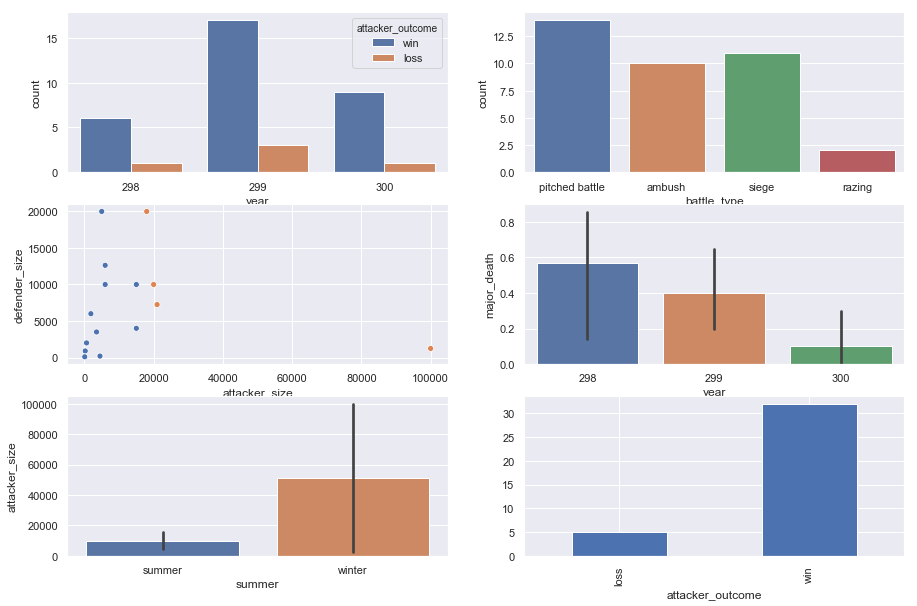

In [6]:
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(15,10))

print('Pitched Battle: An intense battle fought in close contact by troops arranged in a predetermined formation.')
print('An ambush: is a long-established military tactic in which combatants take advantage of concealment and the element of surprise to attack unsuspecting enemy')
print('A siege is a military blockade of a city, or fortress, with the intent of conquering by attrition, or a well-prepared assault.')
print('Razing: complete destruction')

sns.countplot(x = "year", hue = "attacker_outcome",data= dataFrameBattels, ax=axes[0][0])

sns.countplot(x="battle_type",data= dataFrameBattels, ax=axes[0][1])

df_no_nan = dataFrameBattels.dropna(subset=['attacker_size', 'defender_size', 'attacker_outcome'])

sns.relplot(data = df_no_nan, x='attacker_size', y='defender_size',hue = "attacker_outcome", ax=axes[1][0])

df_no_nan_2 = dataFrameBattels.dropna(subset=['year', 'major_death'])

sns.barplot(x="year",y="major_death",data= df_no_nan_2, ax=axes[1][1])

out=dataFrameBattels.groupby(["summer", 'attacker_outcome'])['attacker_size', 'defender_size'].mean().reset_index()
sns.barplot(x = "summer", y= 'attacker_size', data=out,ax=axes[2][0])

dataFrameBattels.groupby('attacker_outcome').size().plot(kind="bar",ax=axes[2][1])
plt.close()


# Now we want to check if there are any statistically  significant differences

In [16]:
dataFrameBattels["attacker_size"]=dataFrameBattels["attacker_size"].dropna()
attack_summer_relation = ols('attacker_size~ C(summer)', data=dataFrameBattels).fit()
aov_table = sm.stats.anova_lm(attack_summer_relation, typ=1)
print(attack_summer_relation.summary(), aov_table)

                            OLS Regression Results                            
Dep. Variable:          attacker_size   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.772
Date:                Tue, 02 Jul 2019   Prob (F-statistic):              0.197
Time:                        07:18:13   Log-Likelihood:                -270.64
No. Observations:                  24   AIC:                             545.3
Df Residuals:                      22   BIC:                             547.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            6812.2778   4

In [20]:
dataFrameBattels["defender_size"]=dataFrameBattels["defender_size"].dropna()
attack_deffend = ols('attacker_size~ defender_size', data=dataFrameBattels).fit()
print(attack_deffend.summary())

                            OLS Regression Results                            
Dep. Variable:          attacker_size   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.058
Method:                 Least Squares   F-statistic:                    0.1782
Date:                Tue, 02 Jul 2019   Prob (F-statistic):              0.679
Time:                        07:21:41   Log-Likelihood:                -183.51
No. Observations:                  16   AIC:                             371.0
Df Residuals:                      14   BIC:                             372.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.693e+04   9548.923      1.773

/anaconda3/envs/acc/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


## We see that nor defender side , nor summer condtion could not explain attacker size. Perhas, it happens because the data is not normally distributed. Let's check which battle was with a very huge armies.

### We see that Stannis - is the most aggressive king. 

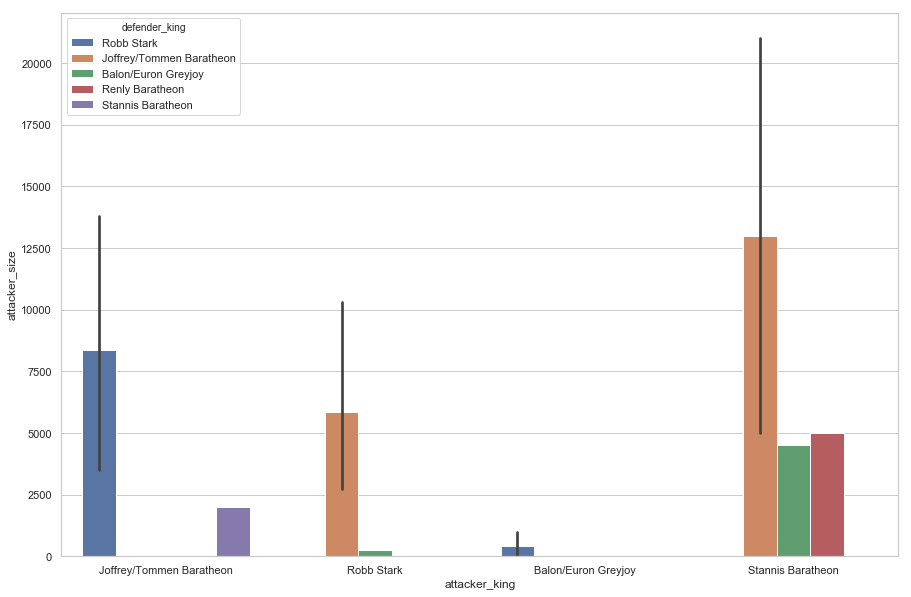

In [124]:
plt.subplots(figsize=(15,10))
sns.set(style="whitegrid")
sns.barplot(x= 'attacker_king',y='attacker_size', hue= 'defender_king', data=dataFrameBattels)

### We decided to remove Battle of Castle Black from the data and run regression again.
Suprisingly, there is still no correlation...

In [95]:
index=dataFrameBattels[dataFrameBattels.name=="Battle of Castle Black"].index
dataFrameBattels.drop(index, inplace=True)

In [87]:
attack_summer_relation_2 = ols('attacker_size~ C(summer)', data=dataFrameBattels).fit()
attack_summer_relation_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          attacker_size   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.131
Date:                Tue, 02 Jul 2019   Prob (F-statistic):              0.300
Time:                        08:14:31   Log-Likelihood:                -234.28
No. Observations:                  23   AIC:                             472.6
Df Residuals:                      21   BIC:                             474.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3200.0000   3005.168      1.065      0.299   -3049.590    9449.590
C(summer)[T.1.0]  3612.2778   3397.007      1.063      0.300   -3452.186    1.07e+04
==============================================================================
Omnibus:                        4.353   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                3.565
Skew:                           0.955   Prob(JB):                        0.168
Kurtosis:                       2.733   Cond. No.                         4.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
attack_deffend_2 = ols('attacker_size~ defender_size', data=dataFrameBattels).fit()
attack_deffend_2.summary()

/anaconda3/envs/acc/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          attacker_size   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     3.099
Date:                Tue, 02 Jul 2019   Prob (F-statistic):              0.102
Time:                        08:16:47   Log-Likelihood:                -152.97
No. Observations:                  15   AIC:                             309.9
Df Residuals:                      13   BIC:                             311.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4192.2778   2868.919      1.461      0.168   -2005.645    1.04e+04
defender_size     0.5145      0.292      1.760      0.102      -0.117       1.146
==============================================================================
Omnibus:                        2.034   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.362   Jarque-Bera (JB):                1.585
Skew:                           0.702   Prob(JB):                        0.453
Kurtosis:                       2.248   Cond. No.                     1.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## But we see that major death in the battles is explained by summer condition! More people die in the winter (do they freeze???))

In [121]:
death_battles = ols('major_death~ C(summer)', data=dataFrameBattels).fit()
print(death_battles.summary())

                            OLS Regression Results                            
Dep. Variable:            major_death   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     7.273
Date:                Tue, 02 Jul 2019   Prob (F-statistic):             0.0109
Time:                        08:39:11   Log-Likelihood:                -20.097
No. Observations:                  35   AIC:                             44.19
Df Residuals:                      33   BIC:                             47.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.376e-17      0.147  

# Character Deaths

How many (main) Characters died per year?: 
Death Year
297.0      3
298.0     46
299.0    156
300.0    100


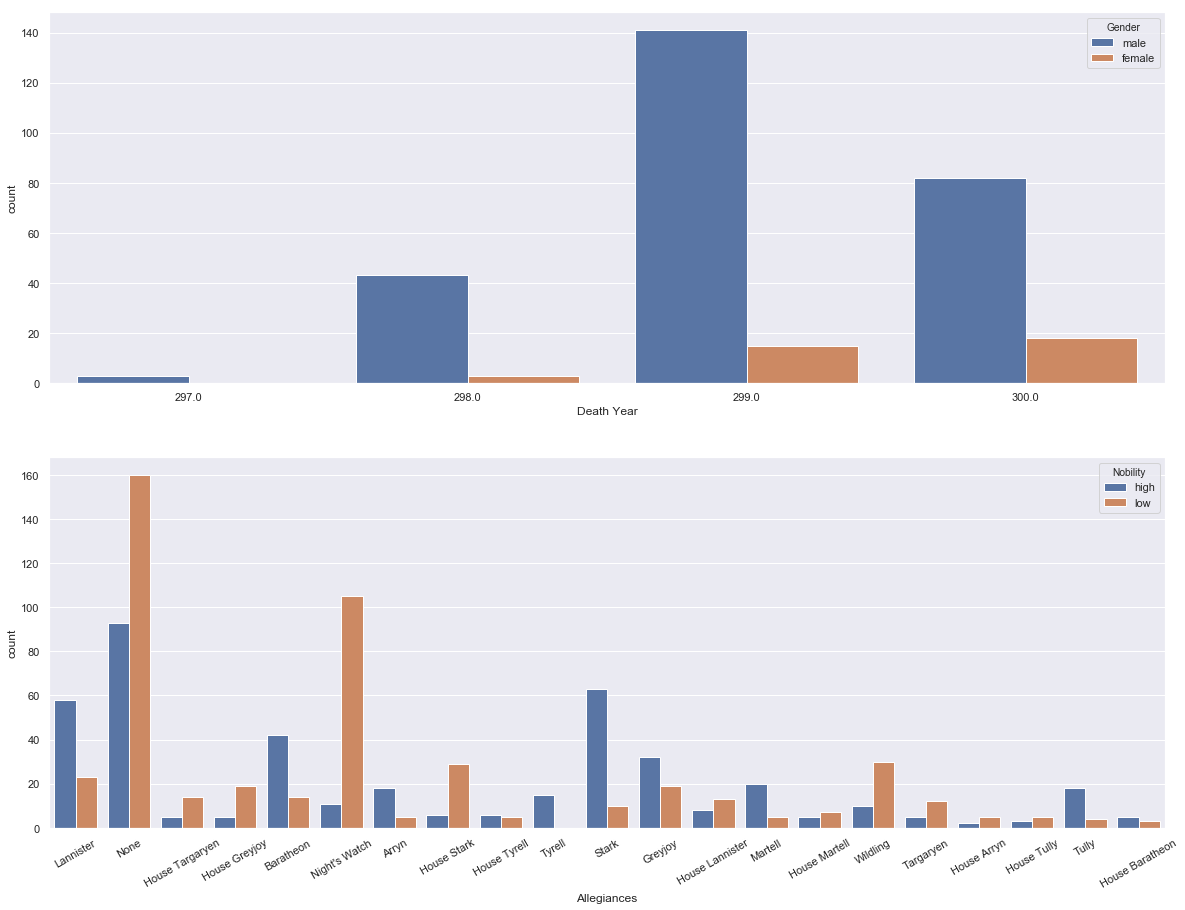

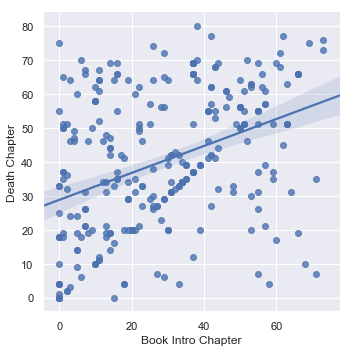

In [7]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(20,15))

death_per_year = dataFrameChar.groupby(["Death Year"])["Allegiances"].count()
print("How many (main) Characters died per year?: " +'\n'+ death_per_year.to_string())

sns.countplot(x = "Death Year", hue = "Gender",data= dataFrameChar, ax=axes[0])

b =sns.countplot(x = "Allegiances", hue = "Nobility",data= dataFrameChar, ax=axes[1])
b.set_xticklabels(b.get_xticklabels(), rotation=30)

duration_frame = dataFrameChar.dropna(subset=['Death Chapter', 'Book Intro Chapter'])

sns.lmplot(data = duration_frame, x ='Book Intro Chapter', y='Death Chapter')

plt.tight_layout()
plt.show()
plt.close()


### With a help of T-test we see that is no correlation between death per year and battles number...

In [96]:
battles_per_year=dataFrameBattels.groupby("year").count().reset_index()
death_battles= scp.stats.f_oneway(death_per_year, battles_per_year['battle_number'])
death_battles

F_onewayResult(statistic=2.6333838563344294, pvalue=0.16556568987168638)

# Character Predictions

[Text(0, 0, '0.0'),
 Text(0, 0, '0.1'),
 Text(0, 0, '0.2'),
 Text(0, 0, '0.3'),
 Text(0, 0, '0.4'),
 Text(0, 0, '0.5'),
 Text(0, 0, '0.6'),
 Text(0, 0, '0.7'),
 Text(0, 0, '0.8'),
 Text(0, 0, '0.9'),
 Text(0, 0, '1.0')]

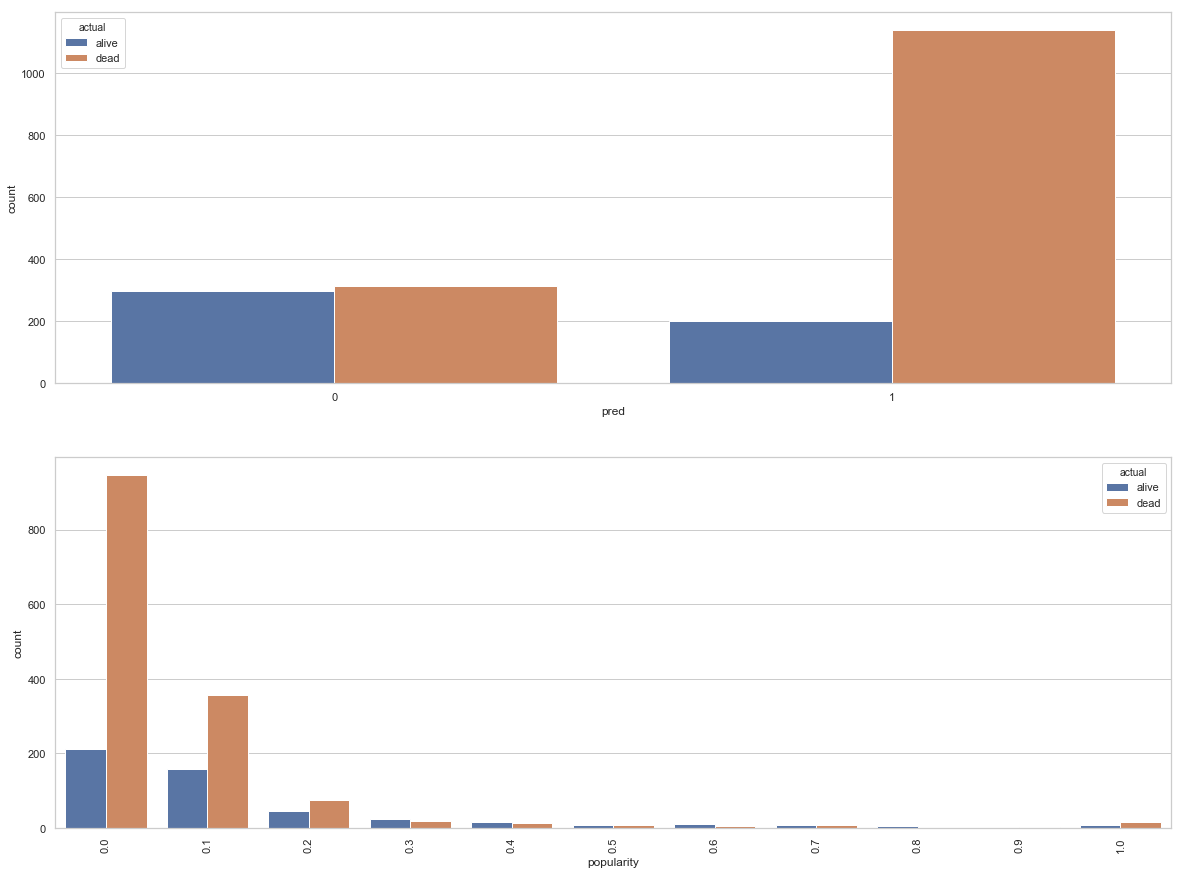

In [98]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(20,15))

clean_df = dataFrameCharPre.dropna(subset=['actual', 'popularity'])
clean_df = clean_df.round({'popularity': 1})
b = sns.countplot(data = clean_df, x='pred', hue='actual',ax=axes[0])

a = sns.countplot(data = clean_df, x='popularity', hue='actual',ax=axes[1])
a.set_xticklabels(a.get_xticklabels(), rotation=90)


### Linear regression model proofs that the more popular is the character the less probable he will be killed by the author

In [112]:
pop=clean_df.groupby("popularity").count().reset_index()
pop = ols('actual ~ popularity', data=pop).fit()
pop.summary()

/anaconda3/envs/acc/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     7.919
Date:                Tue, 02 Jul 2019   Prob (F-statistic):             0.0202
Time:                        08:31:22   Log-Likelihood:                -76.293
No. Observations:                  11   AIC:                             156.6
Df Residuals:                       9   BIC:                             157.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    545.9545    155.169      3.518      0.007     194.938     896.971
popularity  -738.0909    262.283     -2.814      0.020   -1331.417    -144.764
==============================================================================
Omnibus:                        5.805   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                2.363
Skew:                           1.071   Prob(JB):                        0.307
Kurtosis:                       3.754   Cond. No.                         4.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Just for more 

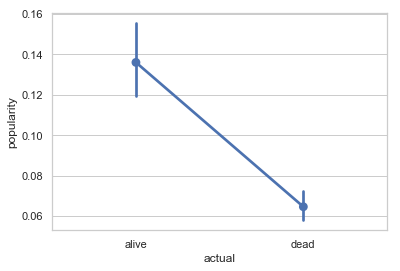

In [118]:
sns.pointplot(data = clean_df, x= 'actual', y='popularity')